In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get


In [2]:
# Sample size
Ts = 0.001

# Number of samples
N = 1000

# Sample range
sample_range = np.linspace(0,1,N)

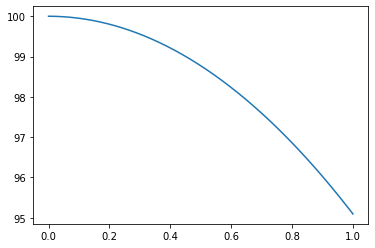

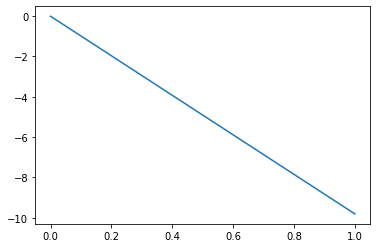

In [3]:
# Initializze state matrices
# X = np.array([[105],[0]])
# P0 = np.diag((0.01, 0.01, 0.01, 0.01))
P = np.diag((10,0.01))
F = np.array([[1,Ts],[0,1]])
# Q = np.eye(X.shape[0])
Q = np.zeros((2,2))
# B = np.eye(X.shape[0])
G = np.array([[-0.5*(Ts**2)],[-Ts]])
# U = np.zeros((X.shape[0],1)) 
U = 9.80665
H = np.array([1,0])
I = np.eye(2)
X_t = np.array([[100],[0]])
xt0 = []
xt1 = []
for i in range(0,N):
    X_t = np.dot(F,X_t) + np.dot(G,U)
    xt0.append(X_t[0,0])
    xt1.append(X_t[1,0])
#     plt.plot(sample_range[i],X_t[0,0])


# plt.plot(sample_range,xt0[0,:])
# plt.plot(xt0[:,0])
# X_t[0,1]
# len(xt0)
plot1 = plt.figure(1)
plt.plot(sample_range,xt0)
plot2 = plt.figure(2)
plt.plot(sample_range,xt1)

X0 = [xt0,xt1]

# plt.plot(sample_range,X0[0,0])
# X0[0]


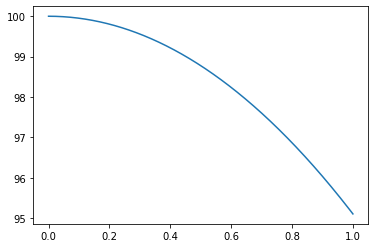

In [4]:
xx = np.zeros((2,N))
xx[:,0] = [100,0]
# for i in range(1,10):
#     xx[:,i] =  np.dot(F,xx[:,i-1]) + np.dot(G,U)
    
# Time update - prediction
for k in range(1,N):
    xx[:,k] = np.dot(F,xx[:,k-1]) + np.dot(G.T,U)

plt.plot(sample_range,xx[0,:])

array([100.30344205, 101.25105494,  99.207534  ,  97.64286724,
        98.89184767, 101.26011301, 102.58769137,  98.08724991,
       100.28706814, 101.97011252, 100.50800301, 100.24113421,
        99.6826726 , 100.4102882 ,  98.37069392,  99.92933583,
       100.82076205, 100.61724696, 100.16576446, 101.12687482,
        99.35702764, 100.22630463, 100.00294594,  99.8982034 ,
       101.59949125, 102.80666797,  99.33425845, 100.49882364,
       100.49905473, 100.17428962,  98.85098571, 100.47159681,
        98.1574257 ,  99.96779065, 100.48766509, 102.51435638,
        98.17203105, 100.22482619,  99.91230052, 100.32030686,
        99.86233926, 101.73488769,  98.53347988, 102.07382033,
       103.7236031 ,  99.53323278, 101.96178751,  99.1799661 ,
        97.92839137, 100.21874284, 101.4368799 ,  99.18819879,
       101.76319568,  99.8954881 ,  98.20580594,  99.84475615,
        98.2543143 , 100.36580082, 101.47626259,  98.8866437 ,
        99.91926075,  99.98305941, 100.44567491,  95.74

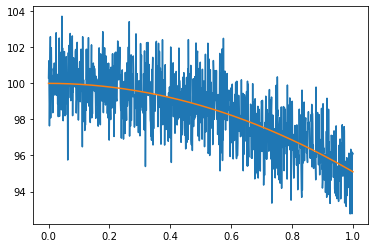

In [5]:
# z = np.array([H[0,0]*X[0,0] + abs(0.1 * np.random.randn(1)[0])],[H[1,0]*X[1,0] + abs(0.1 * np.random.randn(1)[0])])
# R0 = np.random.randint(1,N)
R0 = 2
# r0 = 10
# R = np.array([[r0,0],[0,r0]])
# R = np.zeros((2,2)) * 4
# z1 = H[0]*X_t[0,0] + abs(np.sqrt(R0) * np.random.randn(1)[0])
# z2 = H[1]*X_t[1,0] + abs(np.sqrt(R0) * np.random.randn(1)[0])
# z1 = H[0]*xx[0,0] + abs(np.sqrt(R0) * np.random.randn(1)[0])
# z2 = H[1]*xx[1,0] + abs(np.sqrt(R0) * np.random.randn(1)[0])
z1 = np.dot(H[0],xx[0,0]) + abs(np.sqrt(R0) * np.random.randn(1)[0])
z2 = np.dot(H[1],xx[1,0]) + abs(np.sqrt(R0) * np.random.randn(1)[0])
# z1 = np.array([H[1,0]*X[1,0] + abs(0.1 * np.random.randn(1)[0])
# H[1,0]
z0 = [[z1],[z2]]
z = np.array(z0)
# z11 = z.T
# z11
# R = np.eye(2)
# z
# R


zz = np.matmul(H,X0) + (np.sqrt(R0) * np.random.randn(N))

# Generate noisy measurements from state
# m^2/s^2
# R = 2
# Measurement noise
# v = np.sqrt(R) + np.random.randn(N)
# Noisy measurement
# zz = np.matmul(H,xx) + v

# np.sqrt(R)

# rc,cc = zz.shape()
plt.plot(sample_range,zz,sample_range,xt0)
# np.sqrt(R[0,0]) * np.random.randn(1)
# zz[1]
# zz[0]

zz

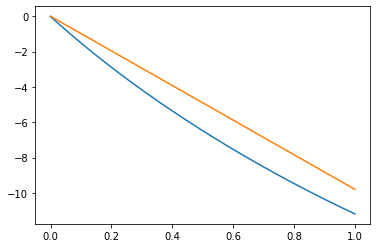

In [6]:
# Initialize KF

# xt0 = []
# xt1 = []
# for i in range(0,N):
#     X_t = np.dot(F,X_t) + np.dot(G,U)
#     xt0.append(X_t[0,0])
#     xt1.append(X_t[1,0])

X = np.array([[105],[0]])
# X = np.array([105,0])
# P = np.diag((0.01, 0.01, 0.01, 0.01))
# P = np.ones((2,2)) * 0.01
P = np.diag((0.01,0.01))

r0 = 4
R = np.array([[r0,0],[r0,0]])

x_0 = []
x_1 = []
for k in range(0,N):
    # Predict the state vector
    X = np.dot(F,X) + np.dot(G,U)
    # Predict the covariance
    P = np.dot(F,np.dot(P,F.T)) + Q
#     plt.plot(X[0,0], X[1,0], 'o', color='red')
    # Calculate the Kalman Gain
    S = H.dot(P).dot(H.T) + R
#     S1 = np.dot(H,np.dot(P,H.T)) 
#     print(S)
#     print(S1)
    K = np.dot(np.dot(P,H.T),np.linalg.pinv(S))
    nu = np.dot(H,X)
    X = X + np.dot(K,zz[0]-nu[0])
    x_0.append(X[0,0])
    x_1.append(X[1,0])
    P = P - np.dot(K, np.dot(S,K.T))
#     plt.plot(X[0,0], 'o', color='blue')

plt.plot(sample_range,x_1,sample_range,xx[1,:])
# X[0,0], X[1,0]
# zz1 = np.array(zz)
# zz[1,0]-nu
# np.dot(K,zz1[0] - nu[0]) + K